# EDA - Exploratory Data Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

## 1. Loading and overview of the dataset

In [18]:
df = pd.read_csv("../data/raw/IBM_Stock_1980_2025.csv")

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor
0,1980-01-02,15.057361,15.415870,14.937859,14.937859,0.965845,"1,723,808",0.0,0.0,0.064657
1,1980-01-03,14.937859,15.176864,14.639101,15.176864,0.981298,"2,553,495",0.0,0.0,0.064657
2,1980-01-04,15.176864,15.236616,15.057361,15.146989,0.979366,"1,978,195",0.0,0.0,0.064657
3,1980-01-07,15.146989,15.146989,14.967734,15.087237,0.975503,"1,480,718",0.0,0.0,0.064657
4,1980-01-08,15.087237,16.132887,14.967734,16.103010,1.041180,"2,968,130",0.0,0.0,0.064657


In [26]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor
count,11488,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000,1.148800e+04,11488.000000,11488.000000,11488.000000
mean,2002-10-04 06:31:57.827298048,86.395437,87.205402,85.627898,86.434003,50.850399,6.686743e+06,0.009136,0.000440,0.411739
min,1980-01-02 00:00:00,9.799235,9.978489,9.709608,9.799235,0.800124,0.000000e+00,0.000000,0.000000,0.064657
25%,1991-05-12 06:00:00,27.605164,27.844168,27.336281,27.605164,2.569202,3.918679e+06,0.000000,0.000000,0.104355
50%,2002-09-30 12:00:00,84.574570,85.468452,83.742832,84.694077,42.765790,5.603892e+06,0.000000,0.000000,0.504918
75%,2014-02-27 06:00:00,132.660133,133.749996,131.791824,132.796360,93.500592,8.137932e+06,0.000000,0.000000,0.597871
max,2025-07-30 00:00:00,294.549988,296.160004,290.359985,294.779999,294.779999,7.263916e+07,1.680000,2.000000,1.000000
std,NaN,59.715942,60.191946,59.273661,59.765258,52.400382,4.435882e+06,0.100572,0.028146,0.284595


## 2. Data Cleaning

In [21]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Adj Factor      0
dtype: int64

In [22]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume           object
Dividends       float64
Stock Splits    float64
Adj Factor      float64
dtype: object

In [23]:
df["Volume"] = df["Volume"].str.replace(",", "", regex=False).astype(int)
df["Date"] = pd.to_datetime(df["Date"])

## 3. Univariate analysis

### Prices

**Open** :  Opening price of the share for the trading day.
   
**High**: Highest price reached during the day.

**Low**: Lowest price reached during the day.

**Close** : Closing price of the share for the day.

**Adj Close**: Price adjusted for dividends and splits. This is the most reliable variable for analysing actual long-term performance.

In [27]:
price_cols = ["Open", "High", "Low", "Close", "Adj Close"]

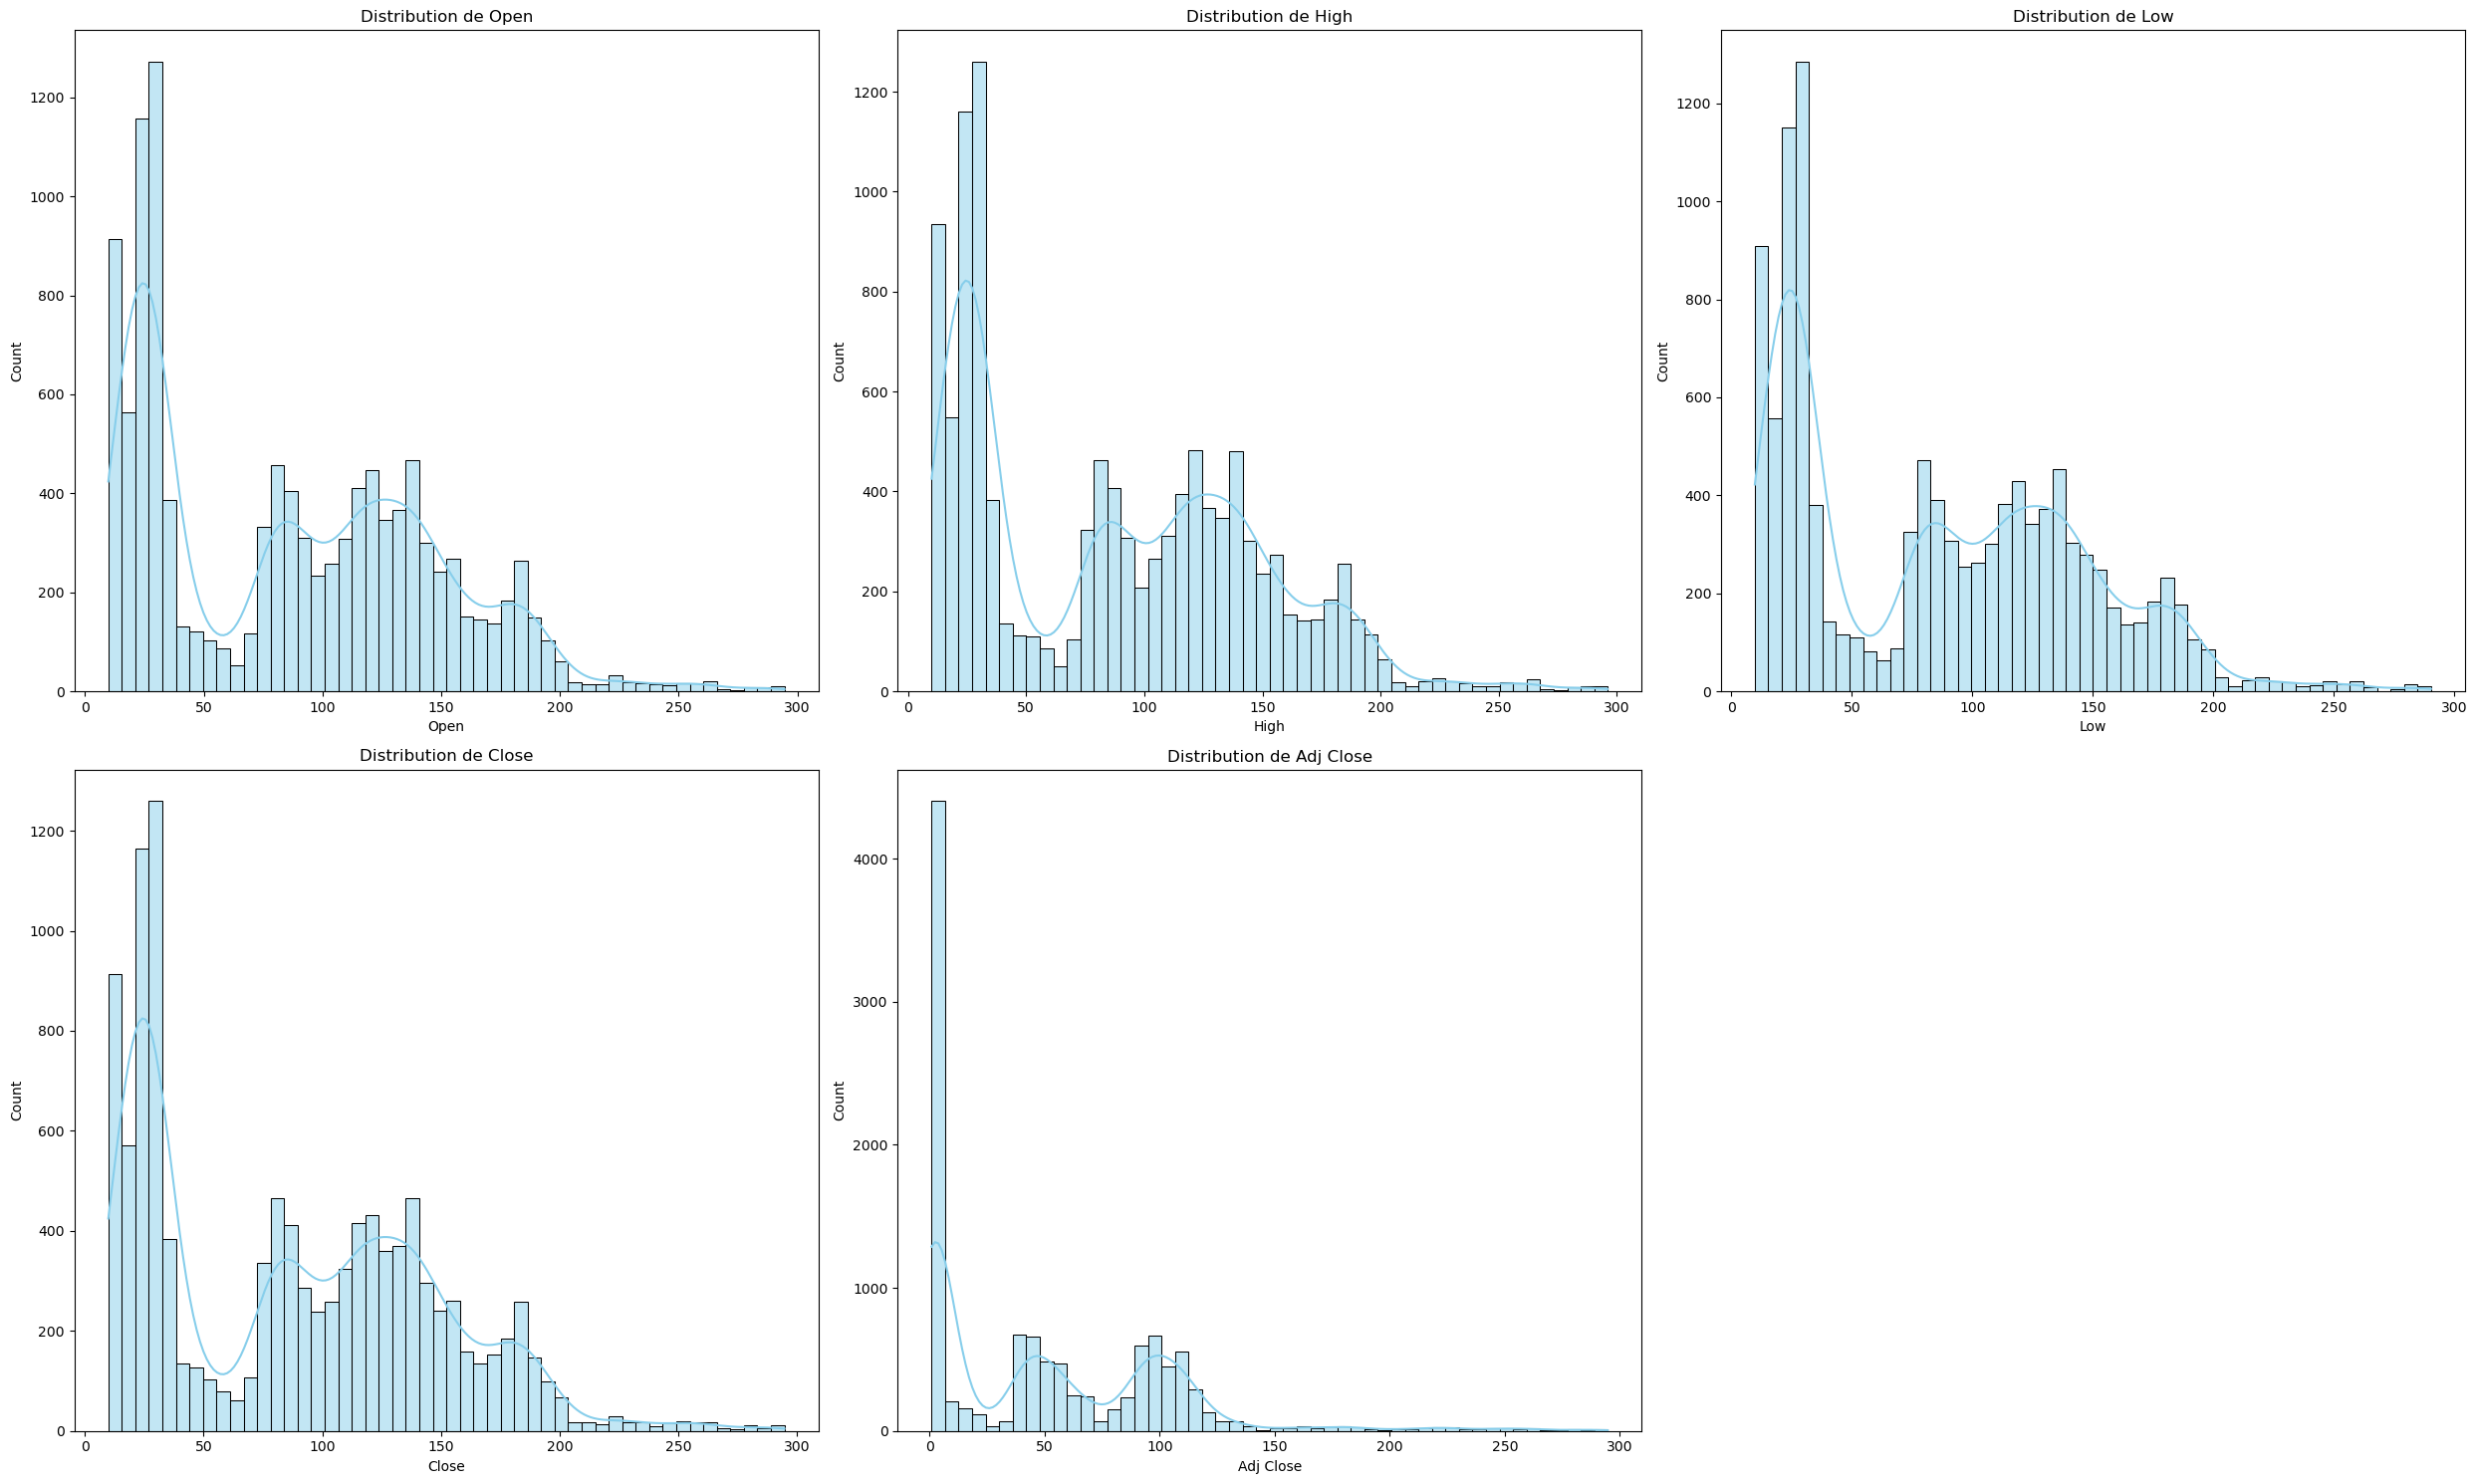

In [ ]:
plt.figure(figsize=(25, 15))
for i, col in enumerate(price_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Prices are highly skewed → statistics such as the mean can be influenced by extreme values.
For certain analyses (such as regression or visualization), it may be useful to log-transform prices or focus on Adj Close.
Multiple modes indicate that historical adjustments (splits, special events) have a visible impact on the distribution.

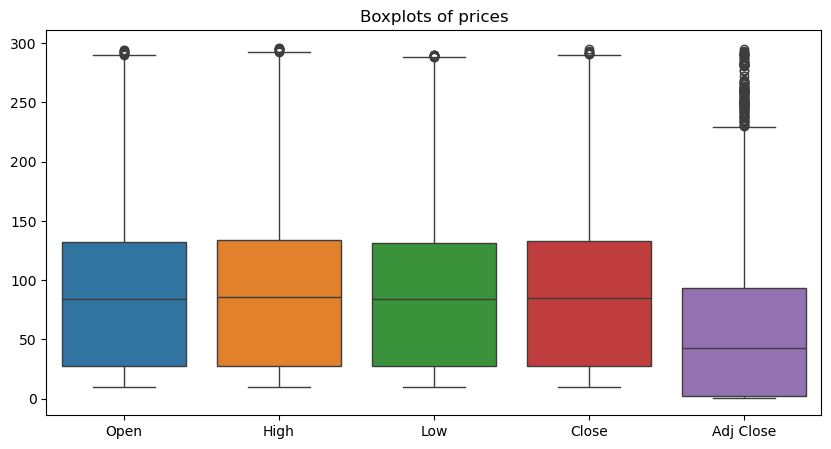

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[price_cols])
plt.title("Boxplots of prices")
plt.show()


### Volumes

Number of shares traded during the day

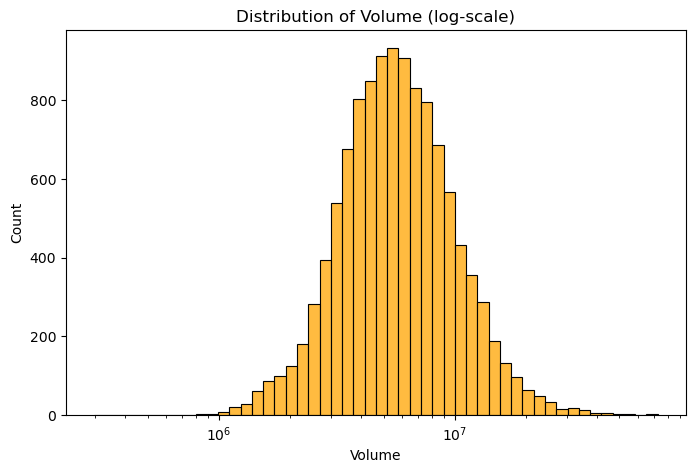

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df["Volume"], bins=50, log_scale=True, color='orange')
plt.title("Distribution of Volume (log-scale)")
plt.xlabel("Volume")
plt.show()


### Dividends & Splits

In [39]:
# Dividends
dividends_non_zero = df[df["Dividends"] != 0]
print("Dividends non nulls :")
print(dividends_non_zero["Dividends"].value_counts())

Dividends non nulls :
Dividends
0.26    19
0.29    19
0.21    13
0.06    11
0.11     8
0.13     6
0.23     5
1.50     4
1.05     4
1.24     4
1.34     4
1.43     4
1.65     4
1.55     4
1.56     4
0.81     4
1.66     4
1.67     4
0.91     4
0.62     4
0.72     4
0.53     4
0.48     4
0.38     4
0.19     4
0.17     4
0.15     4
0.14     4
0.12     4
0.10     4
0.08     4
1.57     2
1.64     2
1.68     1
Name: count, dtype: int64


In [36]:
# Splits
splits_non_zero = df[df["Stock Splits"] != 0]
print("Stock Splits non nuls :")
print(splits_non_zero["Stock Splits"].value_counts())

Stock Splits non nuls :
Stock Splits
2.00    2
1.05    1
Name: count, dtype: int64


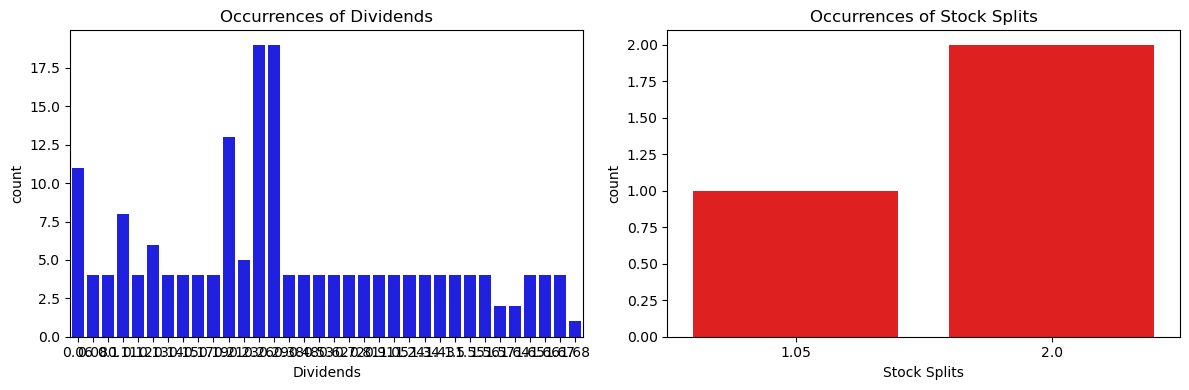

In [43]:
# Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x="Dividends", data=dividends_non_zero, color='blue')
plt.title("Occurrences of Dividends")

plt.subplot(1, 2, 2)
sns.countplot(x="Stock Splits", data=splits_non_zero, color='red')
plt.title("Occurrences of Stock Splits")
plt.tight_layout()
plt.show()

## 4. Temporal Analysis

In [48]:
# Focus on last 40 years
df.set_index('Date', inplace=True)
df = df[df.index >= '1985-01-01']

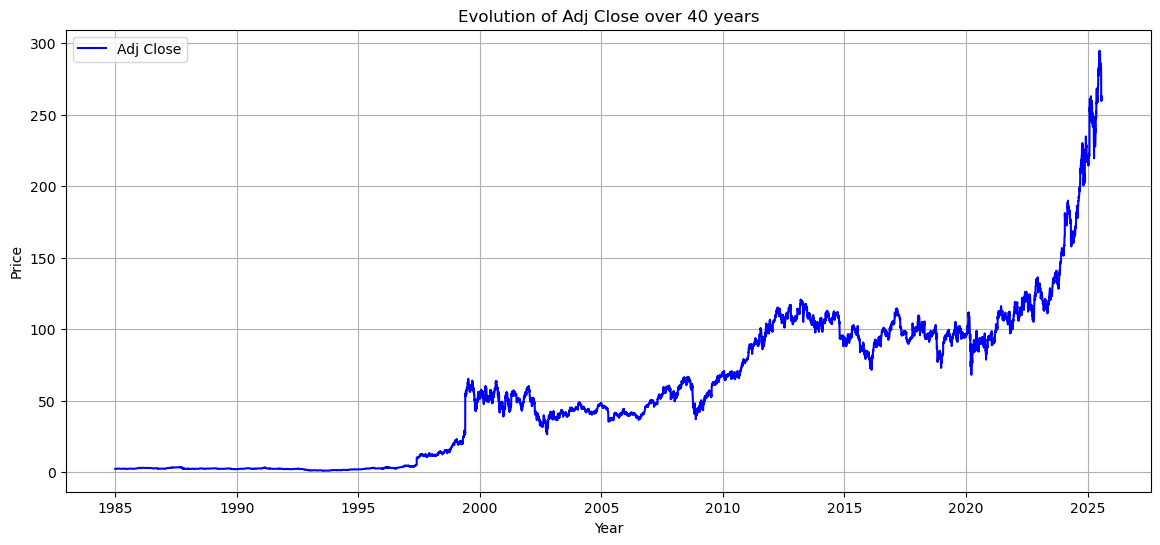

In [49]:
# Plot Adj Close over time
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('Evolution of Adj Close over 40 years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

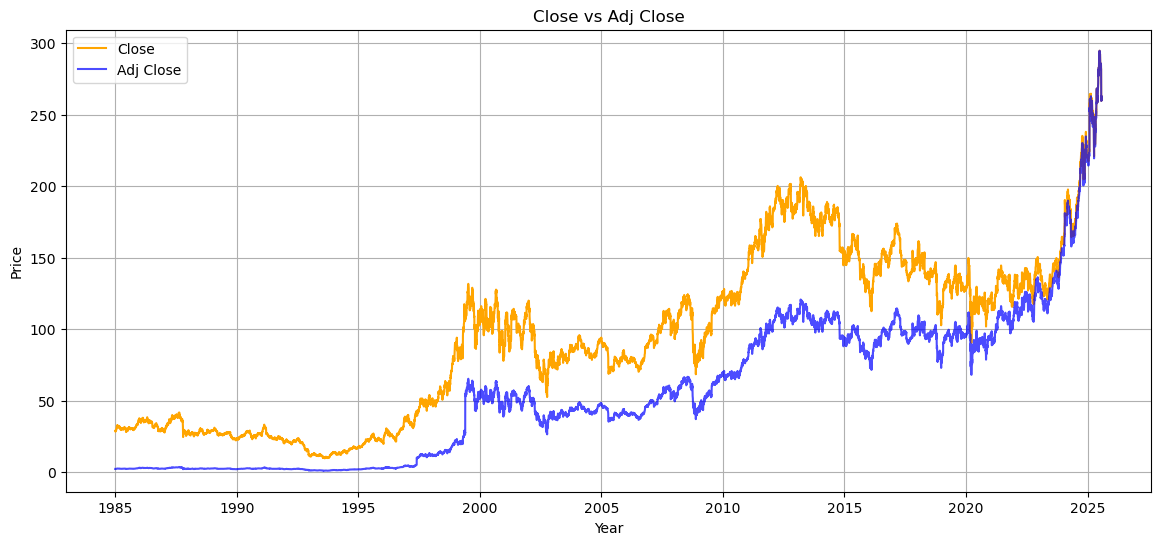

In [50]:
# Compare Close vs Adj Close
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close', color='orange')
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue', alpha=0.7)
plt.title('Close vs Adj Close')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

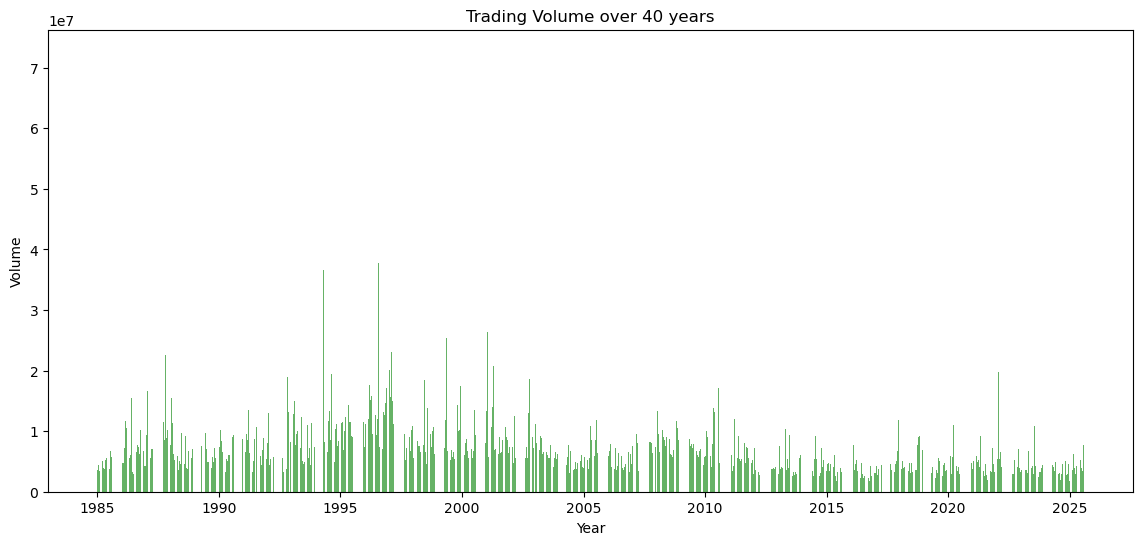

In [51]:
# Evolution of Volume
plt.figure(figsize=(14,6))
plt.bar(df.index, df['Volume'], color='green', alpha=0.6)
plt.title('Trading Volume over 40 years')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

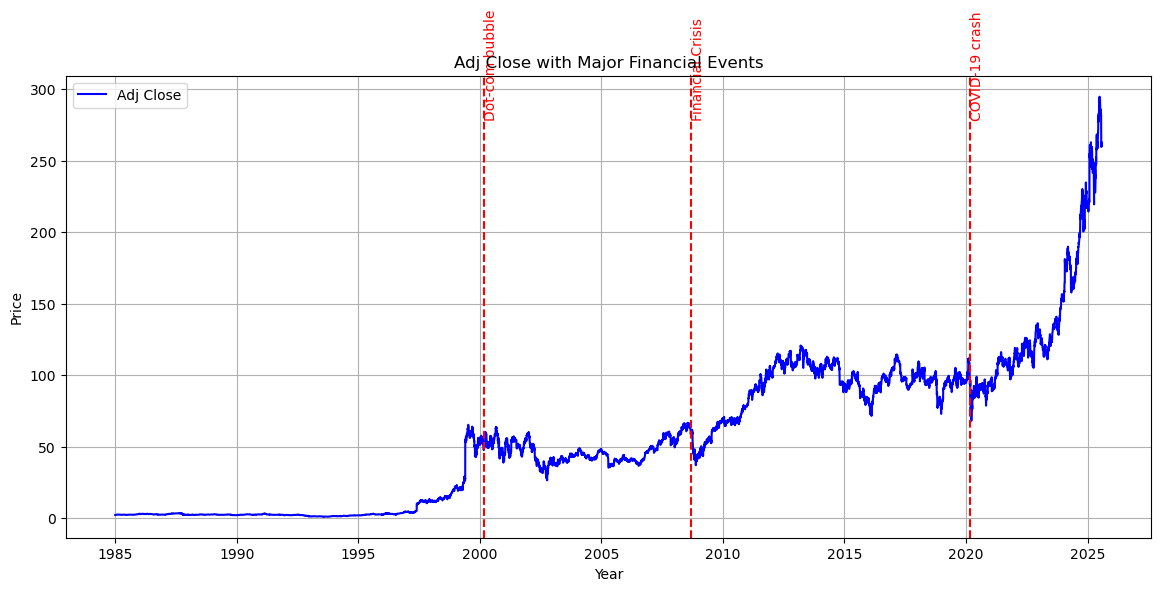

In [52]:
# Highlight major financial events
events = {'Dot-com bubble': '2000-03-01', 'Financial Crisis': '2008-09-01', 'COVID-19 crash': '2020-03-01'}

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), df['Adj Close'].max()*0.95, event, rotation=90, color='red')
plt.title('Adj Close with Major Financial Events')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


## 5. Multivariate Analysis

In [53]:
# Calculate daily returns
df['Daily_Return'] = df['Adj Close'].pct_change()

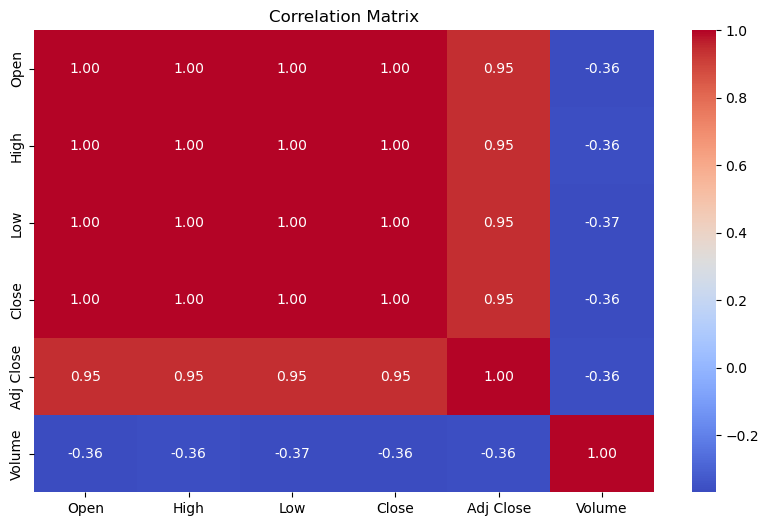

In [54]:
# Correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

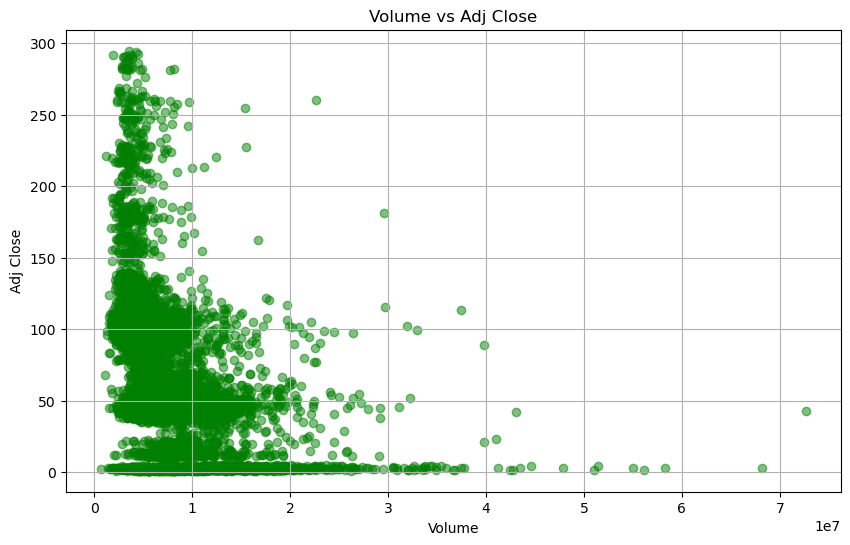

In [55]:
# Scatterplots
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Adj Close'], alpha=0.5, color='green')
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.title('Volume vs Adj Close')
plt.grid(True)
plt.show()

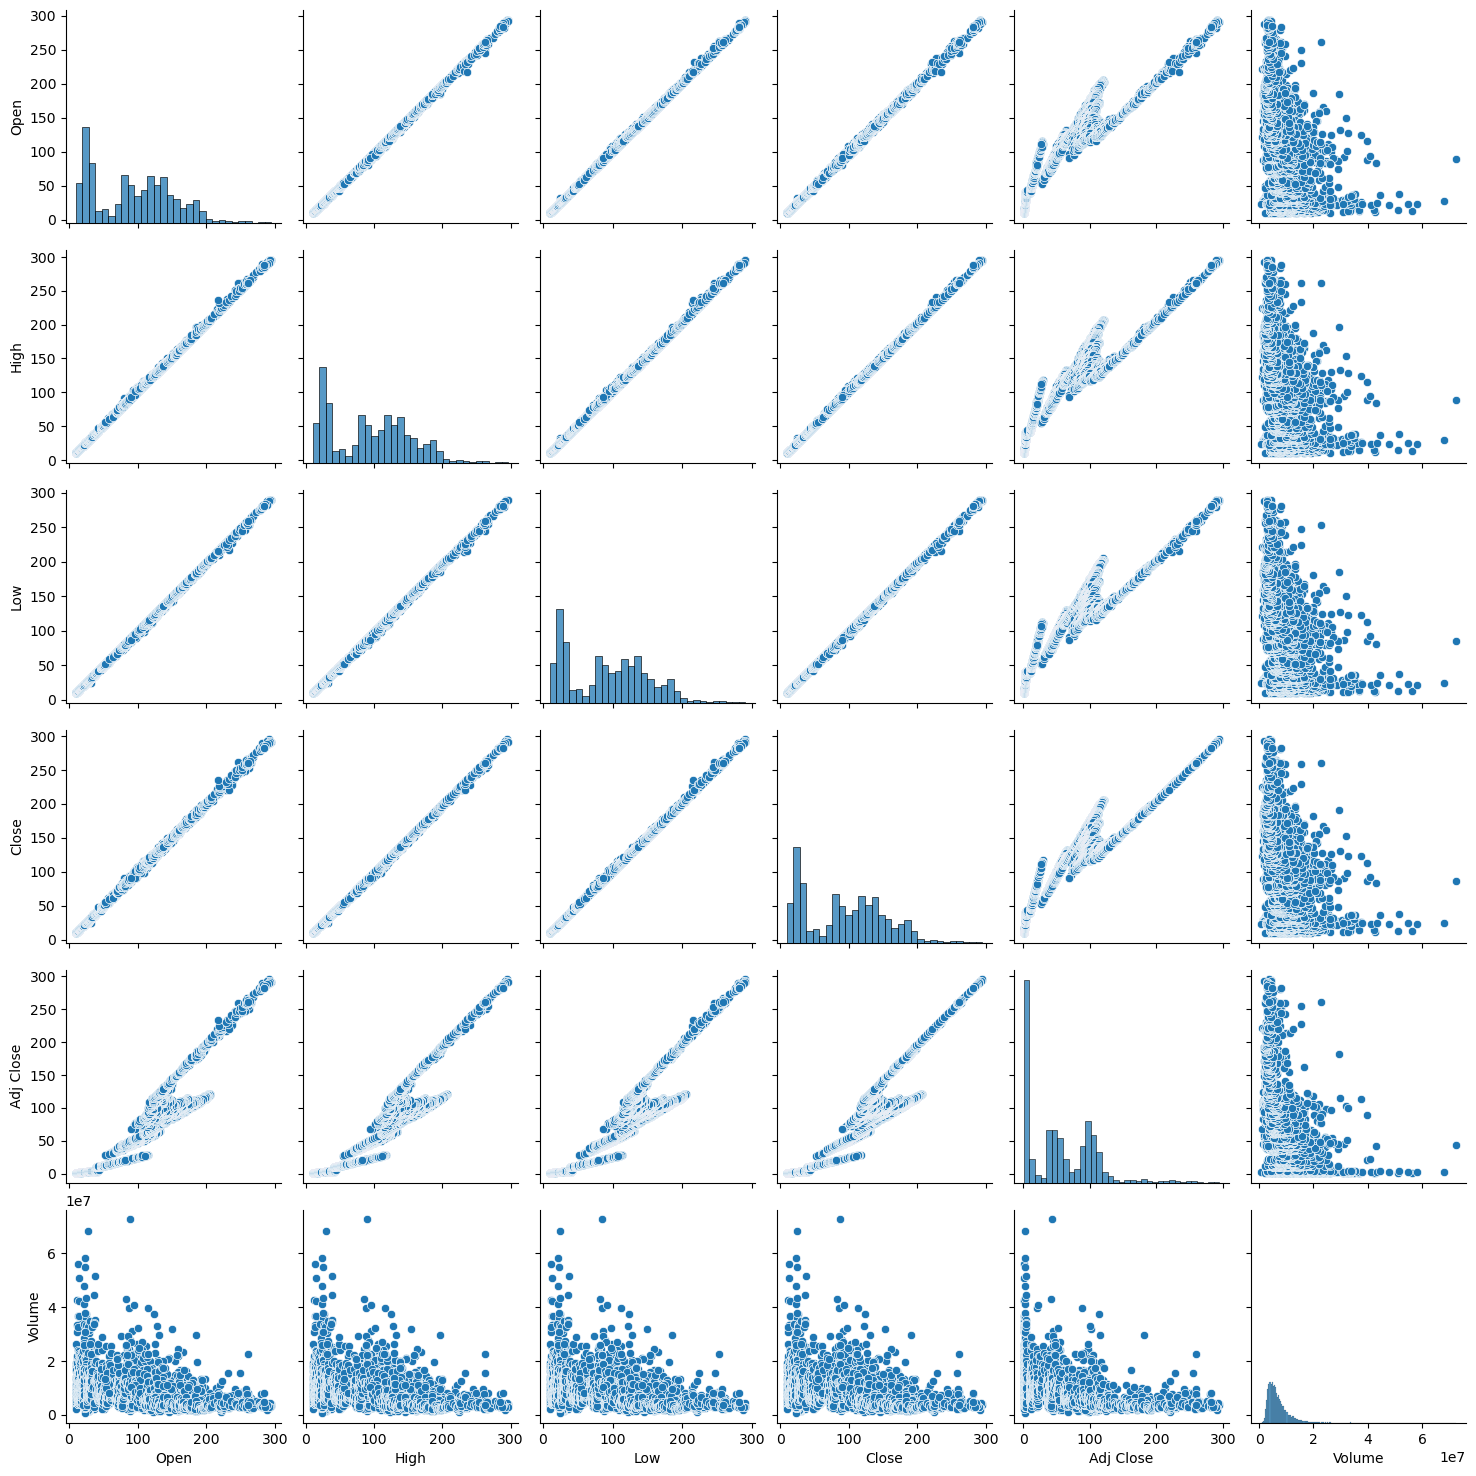

In [56]:
# Pairplots for more relationships
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.show()

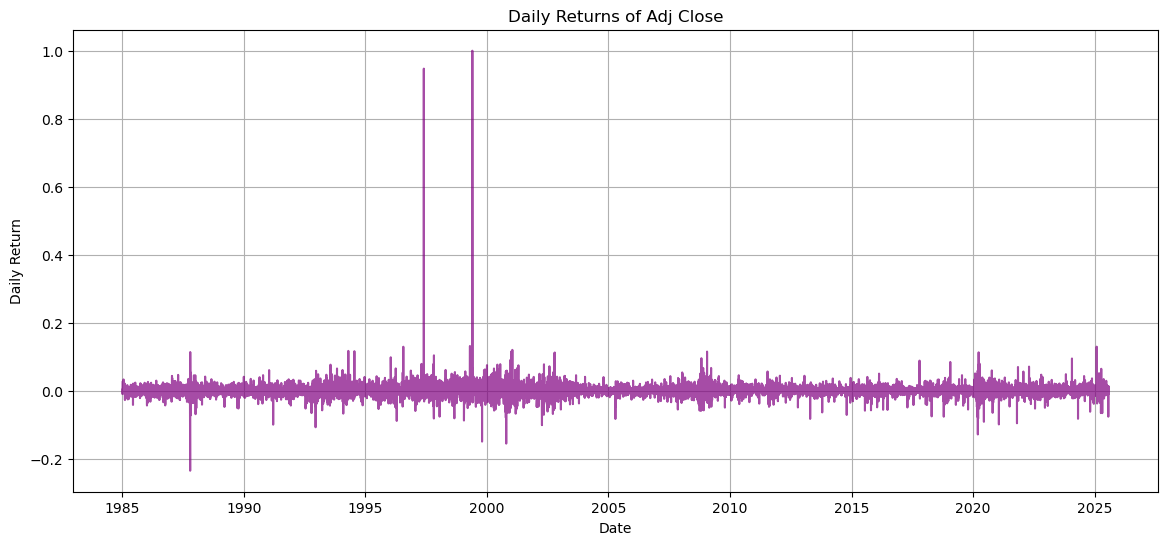

In [57]:
# Daily returns analysis
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily_Return'], color='purple', alpha=0.7)
plt.title('Daily Returns of Adj Close')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

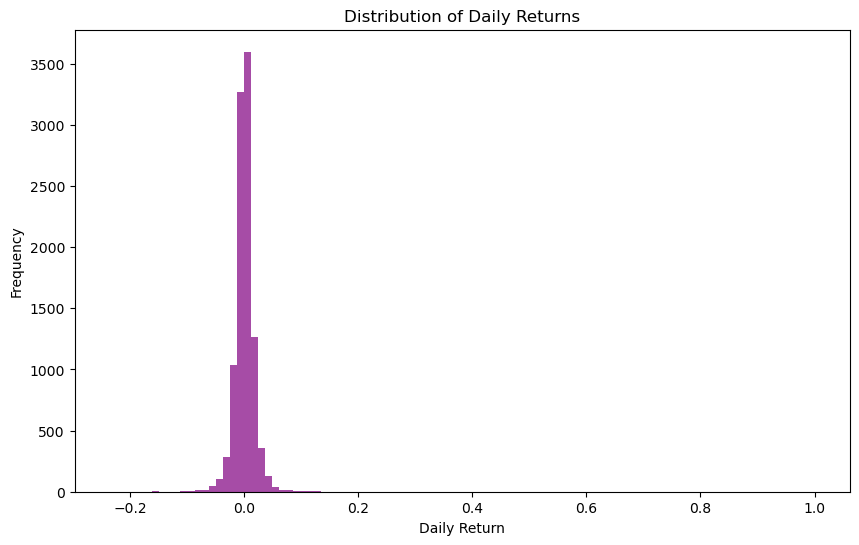

In [58]:
# Histogram of daily returns
plt.figure(figsize=(10,6))
plt.hist(df['Daily_Return'].dropna(), bins=100, color='purple', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


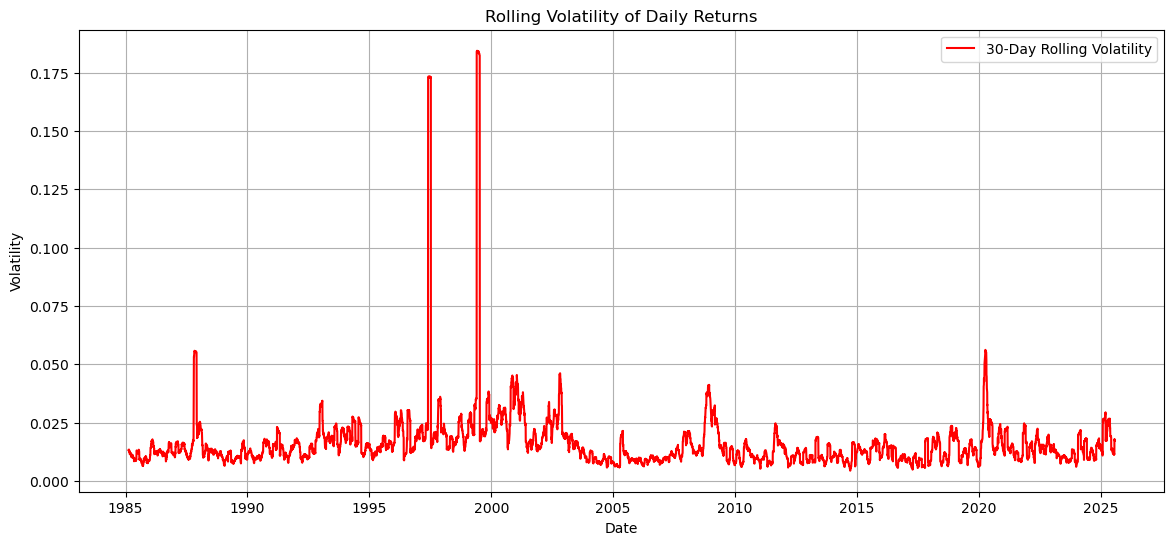

In [59]:
# Rolling volatility
# We'll compute rolling standard deviation of daily returns as a measure of volatility
window = 30  # 30-day rolling window
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Rolling_Volatility'], color='red', label=f'{window}-Day Rolling Volatility')
plt.title('Rolling Volatility of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

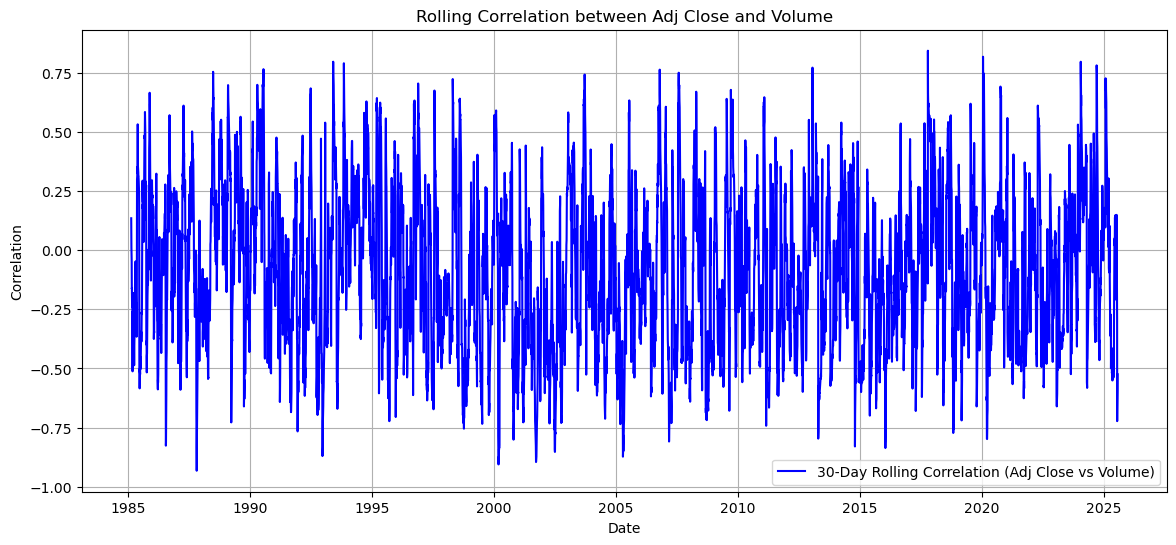

In [60]:
# Rolling correlation between Adj Close and Volume
df['Rolling_Corr'] = df['Adj Close'].rolling(window).corr(df['Volume'])

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Rolling_Corr'], color='blue', label=f'{window}-Day Rolling Correlation (Adj Close vs Volume)')
plt.title('Rolling Correlation between Adj Close and Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.show()

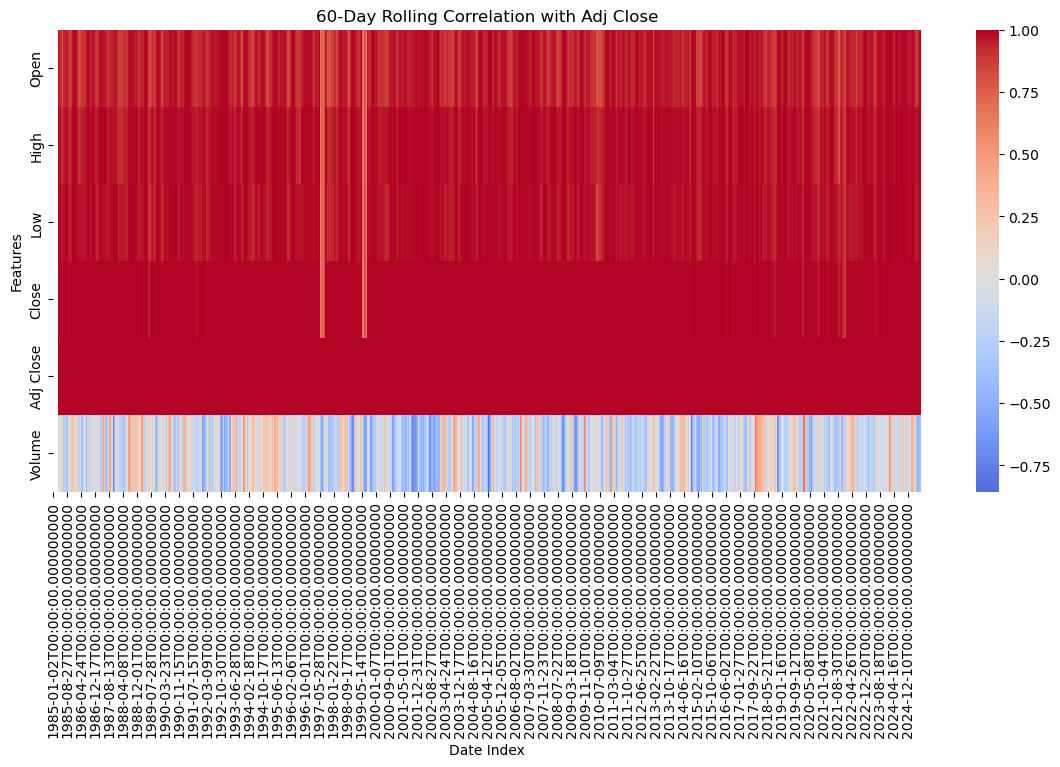

In [62]:
# Rolling correlation heatmap for multiple features
rolling_window = 60  # 60-day rolling correlation
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create a DataFrame to store rolling correlations with Adj Close
rolling_corr_df = pd.DataFrame(index=df.index)
for col in features:
    rolling_corr_df[col] = df['Adj Close'].rolling(rolling_window).corr(df[col])

plt.figure(figsize=(14,6))
sns.heatmap(rolling_corr_df.T, cmap='coolwarm', center=0)
plt.title(f'{rolling_window}-Day Rolling Correlation with Adj Close')
plt.xlabel('Date Index')
plt.ylabel('Features')
plt.show()


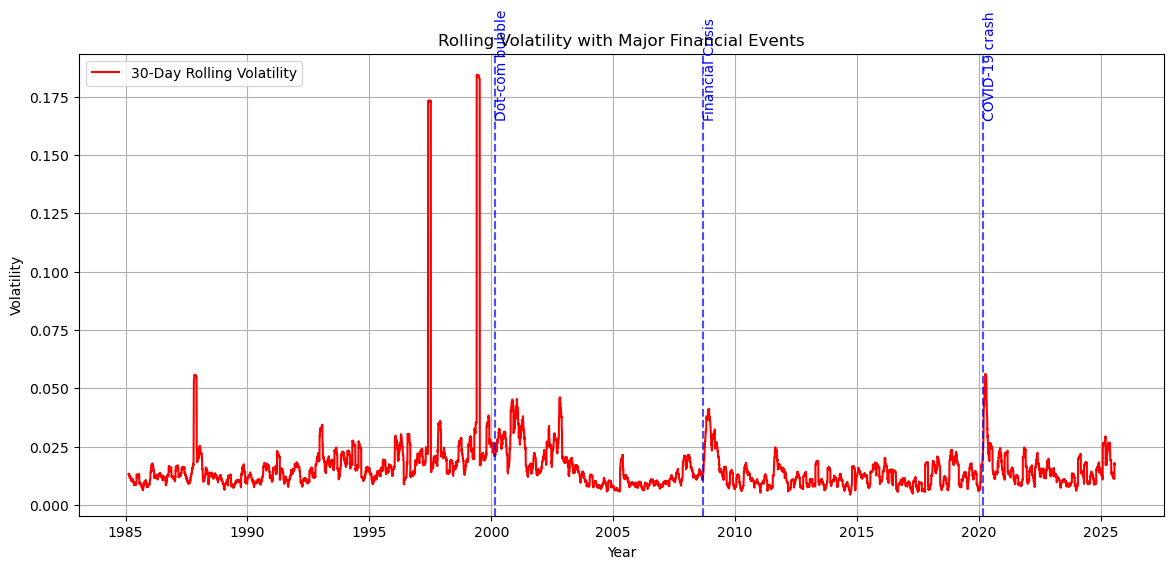

In [64]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Rolling_Volatility'], color='red', label=f'{window}-Day Rolling Volatility')

# Add vertical lines for events
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='blue', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), df['Rolling_Volatility'].max()*0.9, event, rotation=90, color='blue', fontsize=10)

plt.title('Rolling Volatility with Major Financial Events')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

## 6. Feature Engineering

In [69]:
# Daily Returns: reports the daily change in the adjusted price
df['Daily_Return'] = df['Adj Close'].pct_change()

# Cumulative Returns: shows the total return on investment if reinvested daily
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

# Simple Moving Average (SMA): allow you to detect crossovers (potential buy/sell signals)
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()   # 30 days
df['SMA_100'] = df['Adj Close'].rolling(window=100).mean() # 100 days

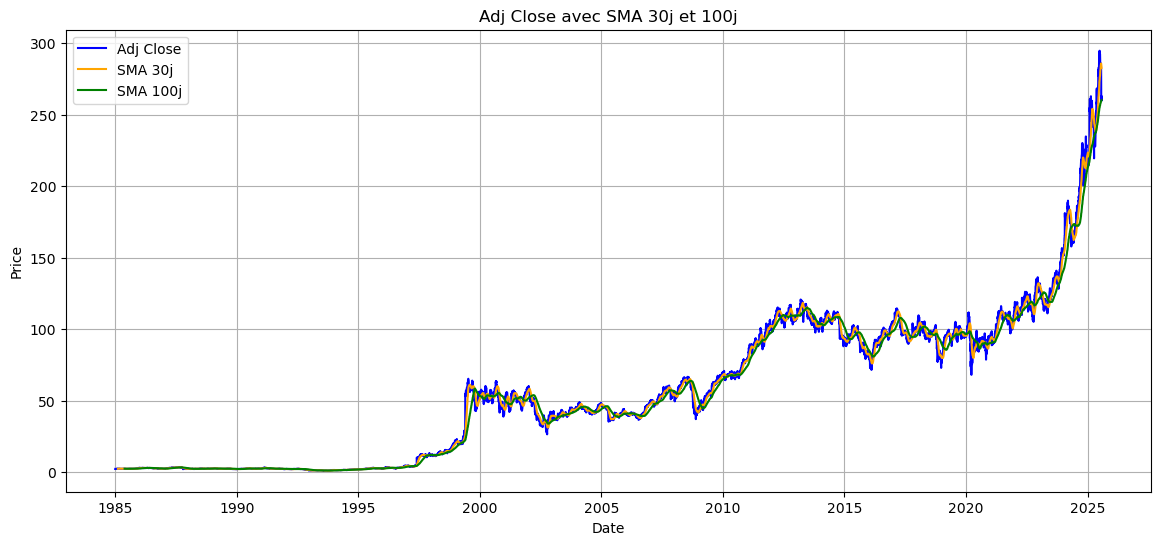

In [70]:
# Visualisation
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_30'], label='SMA 30j', color='orange')
plt.plot(df.index, df['SMA_100'], label='SMA 100j', color='green')
plt.title('Adj Close avec SMA 30j et 100j')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

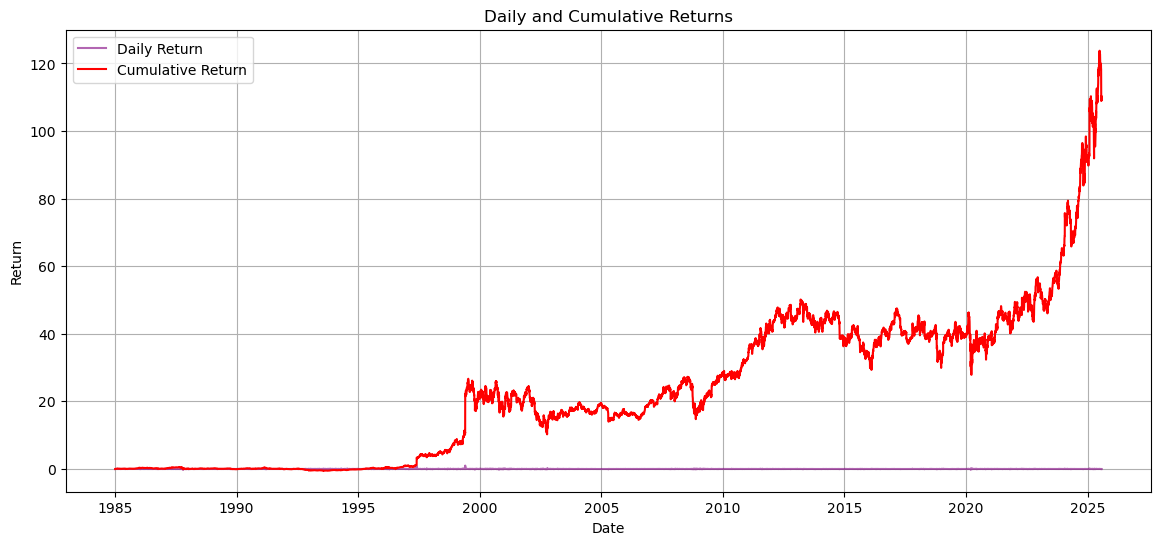

In [71]:
# Visualisation of daily returns and cumulative returns
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily_Return'], label='Daily Return', color='purple', alpha=0.6)
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return', color='red')
plt.title('Daily and Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# EMA (Exponential Moving Average) : reacts more quickly to price changes than the SMA
df['EMA_30'] = df['Adj Close'].ewm(span=30, adjust=False).mean()
df['EMA_100'] = df['Adj Close'].ewm(span=100, adjust=False).mean()

In [78]:
# Bollinger Bands (SMA 20j ± 2*std) : visualization of volatility; prices touching the upper or lower bands may indicate overbought or oversold areas
window_bb = 20
df['SMA_20'] = df['Adj Close'].rolling(window=window_bb).mean()
df['BB_upper'] = df['SMA_20'] + 2 * df['Adj Close'].rolling(window=window_bb).std()
df['BB_lower'] = df['SMA_20'] - 2 * df['Adj Close'].rolling(window=window_bb).std()

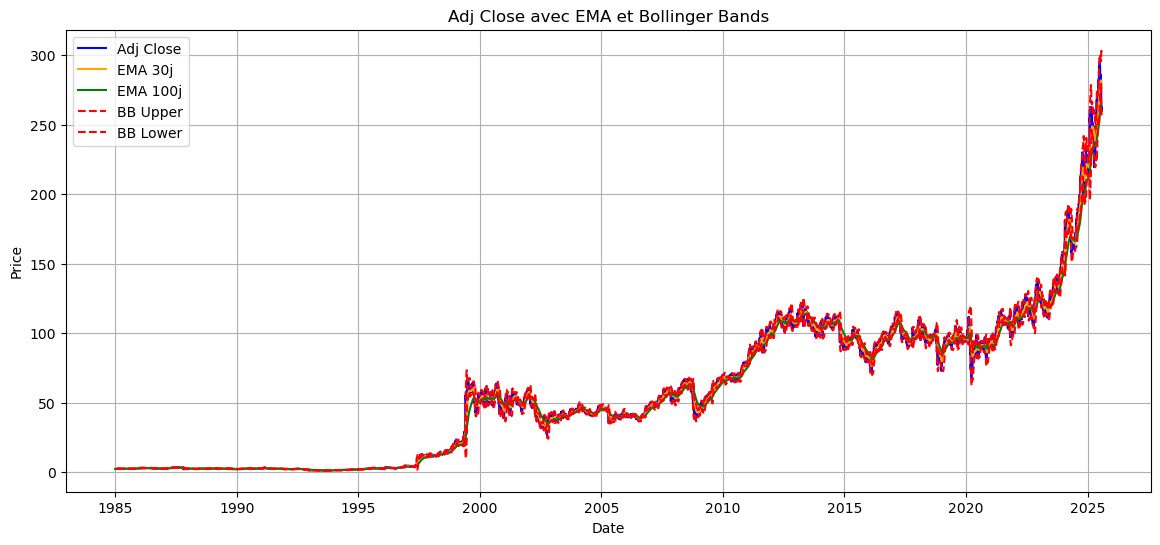

In [82]:
# Visualisation : Adj Close avec Bollinger Bands et EMA
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['EMA_30'], label='EMA 30j', color='orange')
plt.plot(df.index, df['EMA_100'], label='EMA 100j', color='green')
plt.plot(df.index, df['BB_upper'], label='BB Upper', color='red', linestyle='--')
plt.plot(df.index, df['BB_lower'], label='BB Lower', color='red', linestyle='--')
plt.title('Adj Close avec EMA et Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()